# Model Training

Importing neccessari libraries

In [42]:
import pandas as pd
import numpy as np

Previewing Data

In [43]:
df = pd.read_csv('data/raw.csv')
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,isActiveMember,EstimatedSalary,Exited
0,15565701,Ferri,698,Spain,Female,39,9,161994,1,0,0,90212,0
1,15565706,Akobundu,612,Spain,Male,35,1,0,1,1,1,83256,1
2,15565714,Cattaneo,601,France,Male,47,1,64430,2,0,1,96518,0
3,15565779,Kent,627,Germany,Female,30,6,57809,1,1,0,188258,0
4,15565796,Docherty,745,Germany,Male,48,10,96049,1,1,0,74511,0


# 1. Data Pre-Processing

## 1.1 Preparing X and Y variables

In [44]:
X = df.drop(columns=['CustomerId','Surname','Exited'])
y = df['Exited']
X.shape, y.shape

((10000, 10), (10000,))

In [45]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,isActiveMember,EstimatedSalary
0,698,Spain,Female,39,9,161994,1,0,0,90212
1,612,Spain,Male,35,1,0,1,1,1,83256
2,601,France,Male,47,1,64430,2,0,1,96518
3,627,Germany,Female,30,6,57809,1,1,0,188258
4,745,Germany,Male,48,10,96049,1,1,0,74511


In [46]:
y

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    0
Name: Exited, Length: 10000, dtype: int64

## 1.2 Splitting Numeric and Categorical columns

In [47]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print(num_cols)
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print(cat_cols)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'isActiveMember', 'EstimatedSalary']
['Geography', 'Gender']


## 1.3 Transforming and Scalling Data

In [48]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [49]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [50]:
preprocessor = ColumnTransformer(
    [
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

In [51]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,isActiveMember,EstimatedSalary
0,698,Spain,Female,39,9,161994,1,0,0,90212
1,612,Spain,Male,35,1,0,1,1,1,83256
2,601,France,Male,47,1,64430,2,0,1,96518
3,627,Germany,Female,30,6,57809,1,1,0,188258
4,745,Germany,Male,48,10,96049,1,1,0,74511
...,...,...,...,...,...,...,...,...,...,...
9995,711,France,Female,37,8,113900,1,0,0,80215
9996,481,France,Male,37,8,152304,2,1,1,175082
9997,541,Germany,Female,39,9,100117,1,1,1,199808
9998,758,France,Female,34,1,154139,1,1,1,60729


In [52]:
X = preprocessor.fit_transform(X)
X.shape

(10000, 13)

## 1.4 Splitting Data into Training and Testing set

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

# 2 Model Training

## 2.1 Training Varius corresponding models

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
def evaluate_model(true, predicted):
    cr = classification_report(true, predicted)
    cm = confusion_matrix(true, predicted)
    acc = accuracy_score(true, predicted)
    return cr, cm, acc

In [57]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [58]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'LightGBM': LGBMClassifier()
}

In [59]:
model_list = []
accu_score = []

In [60]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluating the train and test set
    model_cr_train, model_cm_train, model_acc_train = evaluate_model(y_train, y_pred_train)
    model_cr_test, model_cm_test, model_acc_test = evaluate_model(y_test, y_pred_test)

    model_name = list(models.keys())[i]
    print(f"Model: {model_name}")
    model_list.append(model_name)

    print('Model perfomance for train set')
    print(f'- Classification Report : \n {model_cr_train}')
    print(f'- Confusion Matrix : {model_cm_train}')
    print(f'- Accuracy Score : {model_acc_train}')

    print('--------------------------------------------')

    print('Model perfomance for test set')
    print(f'- Classification Report :\n {model_cr_test}')
    print(f'- Confusion Matrix : {model_cm_test}')
    print(f'- Accuracy Score : {model_acc_test}')

    accu_score.append(model_acc_test)

    print('='*35)
    print('\n')

Model: Logistic Regression
Model perfomance for train set
- Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      6354
           1       0.59      0.21      0.31      1646

    accuracy                           0.81      8000
   macro avg       0.71      0.59      0.60      8000
weighted avg       0.78      0.81      0.77      8000

- Confusion Matrix : [[6119  235]
 [1301  345]]
- Accuracy Score : 0.808
--------------------------------------------
Model perfomance for test set
- Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1609
           1       0.61      0.22      0.32       391

    accuracy                           0.82      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.79      0.82      0.78      2000

- Confusion Matrix : [[1554   55]
 [ 305   86]]
- Accuracy Score : 0.82


Model: Rand

## 2.2 Comparing Accuracy of Models

In [61]:
import seaborn as sns
import warnings

In [62]:
warnings.filterwarnings('ignore')

[Text(0, 0, 'Gradient Boosting'),
 Text(1, 0, 'LightGBM'),
 Text(2, 0, 'CatBoost'),
 Text(3, 0, 'Random Forest'),
 Text(4, 0, 'XGBoost'),
 Text(5, 0, 'Logistic Regression'),
 Text(6, 0, 'Decision Tree')]

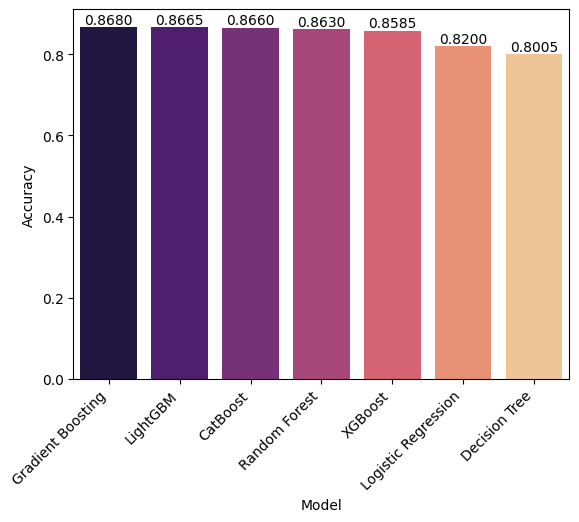

In [63]:
models_accuracies = pd.DataFrame(list(zip(model_list, accu_score)), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
ax = sns.barplot(data=models_accuracies, x='Model', y='Accuracy',palette='magma')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.4f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Random Forest

In [64]:
random_forest = RandomForestClassifier(max_depth=10, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
score = random_forest.score(X_test, y_test)
print(f"Model Accuracy: {score}")

Model Accuracy: 0.87


# Deep Learning - Train Neural Network

In [65]:
print(X.shape)
X

(10000, 13)


array([[ 0.49117386,  0.00745665,  1.37868567, ...,  1.        ,
         1.        ,  0.        ],
       [-0.39864885, -0.37395771, -1.38753759, ...,  1.        ,
         0.        ,  1.        ],
       [-0.51246338,  0.77028538, -1.38753759, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.13326993,  0.00745665,  1.37868567, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.1119804 , -0.4693113 , -1.38753759, ...,  0.        ,
         1.        ,  0.        ],
       [-0.3779553 ,  0.10281024, -0.69598177, ...,  1.        ,
         1.        ,  0.        ]])

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [67]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

In [68]:
# Using Adam optimizer
from tensorflow.keras.optimizers import Adam

In [69]:
optimizer = Adam(learning_rate=0.001)

In [70]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [71]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1654 - mae: 0.2809 - val_loss: 0.1338 - val_mae: 0.2403
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1335 - mae: 0.2593 - val_loss: 0.1186 - val_mae: 0.2419
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1229 - mae: 0.2472 - val_loss: 0.1161 - val_mae: 0.2356
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1232 - mae: 0.2461 - val_loss: 0.1160 - val_mae: 0.2348
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1090 - mae: 0.2246 - val_loss: 0.1157 - val_mae: 0.2490
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1206 - mae: 0.2465 - val_loss: 0.1169 - val_mae: 0.2297
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1140 - mae: 0.2333 - val_loss: 0.1154 - val_mae: 0.2366
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1103 - mae: 0.2260 - val_loss: 0.1130 - val_mae: 0.2353
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1109 

In [73]:
loss, mae = model.evaluate(X_test, y_test)
print(f'MAE: {mae}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0884 - mae: 0.1884  
MAE: 0.18974462151527405


## Cross-Validation with Scikeras

In [74]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score

In [75]:
def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X.shape[1],)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mae')
    return model

In [76]:
regressor = KerasRegressor(model=build_model, epochs=50, batch_size=32, verbose=0)
scores = cross_val_score(regressor, X, y, cv=5)
print("Cross-validated MAE: %.4f (+/- %.4f)" % (scores.mean(), scores.std()))

AttributeError: 'super' object has no attribute '__sklearn_tags__'